예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니다.
예측:1
인증된 사용자입니

TypeError: 'NoneType' object is not subscriptable

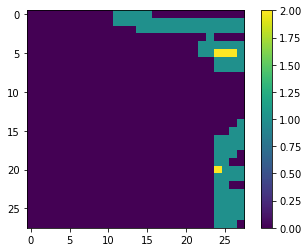

In [6]:
import cv2
import numpy
from keras.models import load_model
import os
from PIL import Image
import matplotlib.pyplot as plt

categories = ["0", "1"] # 0 -> false, 1 -> true
cnn_model = load_model('handgesture_detection.h5')

# 살색 범위
lower = numpy.array([0, 48, 80], dtype = "uint8")
upper = numpy.array([20, 255, 255], dtype = "uint8")

blue_color = (255, 0, 0)
green_color = (0, 255, 0)
red_color = (0, 0, 255)
white_color = (255, 255, 255)

def sketch_transform(image):
    image_grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    return image_grayscale

def showImage(): 
    plt.figure()
    img = Image.open('recognition_img.jpg')
    img = numpy.array(img, 'uint8')
    plt.imshow(img)
    plt.colorbar()
    plt.grid(False)

def normalization(): # 정규화
    img = cv2.imread('recognition_img.jpg') 
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) 
    mask_img2 = cv2.inRange(img2, lower, upper) # 살색 부분 검출
    f_numpy = numpy.array(mask_img2, 'uint8')
    f_numpy = f_numpy/255.0
    resize_f = cv2.resize(f_numpy, dsize=(28, 28), interpolation=cv2.INTER_AREA) # 이미지 리사이징
    cv2.imwrite(os.path.join(os.getcwd(), 'recognition_img'+ '.jpg'), resize_f) # 이미지 저장
    showImage()
    recogUser()

def recogUser(): # 이미지 인식
    image = Image.open('recognition_img.jpg')
    img_numpy = numpy.array(image, 'uint8')
    test_img = img_numpy.reshape(1, 28, 28, 1) # 모델 사이즈에 맞게 리쉐이프
    prediction = cnn_model.predict_classes(test_img)
    if categories[prediction[0]]=='1':
        print('예측:{}'.format(categories[prediction[0]]))
        print("인증된 사용자입니다.")
    else:
        print('예측:{}'.format(categories[prediction[0]]))
        print("인증되지 않은 사용자입니다.")

cam_capture = cv2.VideoCapture(0) # 카메라 시작
str = "hand gesture detection"

# 사각형 좌표
upper_left = (50, 50)
bottom_right = (300, 300)

while True:
    _, image_frame = cam_capture.read() # 영상의 한 프레임씩 읽음, image_frame에 읽은 프레임이 나옴
    image_frame = cv2.flip(image_frame, 1) # 1 : 좌우반전 2 : 상하반전
    cv2.putText(image_frame, str, (10, 35), cv2.LINE_AA, 1, blue_color) # 문자열 화면에 출력

    # Rectangle(이미지, 시작좌표, 종료좌표, 색상, 선 두께)
    r = cv2.rectangle(image_frame, upper_left, bottom_right, blue_color, 5) # 영상에서 사각형(ROI) 그리기
    rect_img = image_frame[upper_left[1]: bottom_right[1], upper_left[0]: bottom_right[0]] # 사각형의 프레임을 반환
    image_frame[upper_left[1]: bottom_right[1], upper_left[0]: bottom_right[0]] = rect_img # 반환받은 프레임을 사각형에
    cv2.putText(rect_img, "HAND", (10, 35), cv2.LINE_AA, 1, blue_color) # 문자열 화면에 출력
    # rect_img를 연속적으로 모델에 입력
    try:
        img2 = cv2.cvtColor(rect_img, cv2.COLOR_BGR2HSV) 
        mask_img2 = cv2.inRange(img2, lower, upper) # 살색 부분 검출
        f_numpy = numpy.array(mask_img2, 'uint8')
        f_numpy = f_numpy/255.0
        resize_f = cv2.resize(f_numpy, dsize=(28, 28), interpolation=cv2.INTER_AREA) # 이미지 리사이징
        cv2.imwrite(os.path.join(os.getcwd(), 'recognition_img'+ '.jpg'), resize_f) # 이미지 저장
        #recogUser()
        # image = Image.open('recognition_img.jpg')
        img_numpy = numpy.array(resize_f, 'uint8')
        test_img = img_numpy.reshape(1, 28, 28, 1) # 모델 사이즈에 맞게 리쉐이프
        prediction = cnn_model.predict_classes(test_img)
        if categories[prediction[0]]=='1':
            cv2.putText(image_frame, "Unlocked", (250, 450), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
            cv2.imshow("UTH_pro", image_frame)
            print('예측:{}'.format(categories[prediction[0]]))
            print("인증된 사용자입니다.")
        else:
            cv2.imshow("UTH_pro", image_frame)
            # print('예측:{}'.format(categories[prediction[0]]))
            # print("인증되지 않은 사용자입니다.")
    except:
        pass
    """
    """
    # cv2.imshow("Image",rect_img) # roi만 나옴
    # cv2.imshow("Video",image_frame) # 영상 전체가 나옴
    if cv2.waitKey(1) == ord('q'): 
        cam_capture.release()
        cv2.destroyAllWindows()
        showImage()
        # break
    """
    cv2.imshow("UTH_pro", image_frame) # 영상 타이틀
    if cv2.waitKey(1) == ord('q'): 
        break
    elif cv2.waitKey(1) == ord('a'):  # 캡쳐
        cv2.putText(rect_img, "print222", (10, 35), cv2.LINE_AA, 1, blue_color) # 문자열 화면에 출력
        cv2.imwrite(os.path.join(os.getcwd(), 'recognition_img' + '.jpg'), rect_img) # 캡쳐한 프레임을 이미지로 저장
        normalization()
    """